In [49]:
import kagglehub
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split 

Start


In [ ]:

# Download dataset
dataset_path = kagglehub.dataset_download("mahdiislam/pressure-sensor-heatmaprgb")

print("Path to dataset files:", dataset_path)

# Check if the dataset directory exists
if dataset_path and os.path.exists(dataset_path):
    print("Files in dataset directory:", os.listdir(dataset_path))
else:
    print("Dataset path does not exist or download failed.")

Path to dataset files: C:\Users\shant\.cache\kagglehub\datasets\mahdiislam\pressure-sensor-heatmaprgb\versions\1
Files in dataset directory: ['X_9_RGB.pickle', 'y_9_RGB.pickle']


In [ ]:
X_path = os.path.join(dataset_path, "X_9_RGB.pickle")
y_path = os.path.join(dataset_path, "y_9_RGB.pickle")

# Check if files exist before loading
if not os.path.exists(X_path):
    raise FileNotFoundError(f"X_9_RGB.pickle not found at {X_path}")
if not os.path.exists(y_path):
    raise FileNotFoundError(f"y_9_RGB.pickle not found at {y_path}")

In [ ]:
X_path = "/root/.cache/kagglehub/datasets/mahdiislam/pressure-sensor-heatmaprgb/versions/1/X_9_RGB.pickle"

In [ ]:
# Define paths dynamically
X_path = os.path.join(dataset_path, "X_9_RGB.pickle")
y_path = os.path.join(dataset_path, "y_9_RGB.pickle")

# Check if files exist
if not os.path.exists(X_path) or not os.path.exists(y_path):
    raise FileNotFoundError("One or both pickle files not found!")

# Load the data
X_data = np.array(pickle.load(open(X_path, "rb")))
y_data = np.array(pickle.load(open(y_path, "rb")))

# Check the shapes
print("X_data shape:", X_data.shape)
print("y_data shape:", y_data.shape)


X_data shape: (1801, 224, 224, 3)
y_data shape: (1801,)


In [45]:
# Train-Test Split
from sklearn.model_selection import train_test_split

# Ensure data is loaded before splitting
if len(X_data) > 0:
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
    print("Dataset Loaded Successfully!")
    print("Training Set:", X_train.shape, y_train.shape)
    print("Test Set:", X_test.shape, y_test.shape)
else:
    print("Error: No data loaded. Check file paths.")


Dataset Loaded Successfully!
Training Set: (1440, 224, 224, 3) (1440,)
Test Set: (361, 224, 224, 3) (361,)


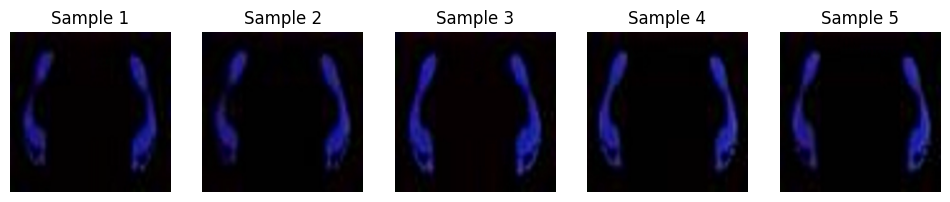

In [ ]:

# Function to display footprint images
def show_footprint_samples(X_data, num_samples=5):
    plt.figure(figsize=(12, 6))
    
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X_data[i])  # Assuming X_data contains RGB images
        plt.axis("off")
        plt.title(f"Sample {i+1}")
    
    plt.show()

# Show sample footprints
show_footprint_samples(X_data, num_samples=5)


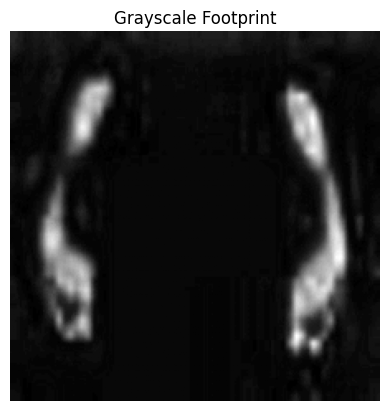

In [47]:

# Convert first image to grayscale and display it
gray_image = cv2.cvtColor(X_data[0], cv2.COLOR_RGB2GRAY)

plt.imshow(gray_image, cmap="gray")
plt.axis("off")
plt.title("Grayscale Footprint")
plt.show()


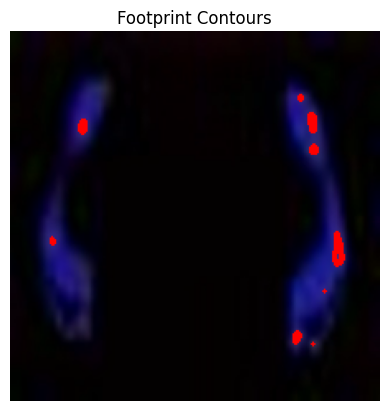

In [48]:
# Extract & Show Contours
# Convert image to binary
_, binary_image = cv2.threshold(gray_image, 50, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on original image
contour_image = X_data[0].copy()
cv2.drawContours(contour_image, contours, -1, (255, 0, 0), 2)  # Draw in blue

plt.imshow(contour_image)
plt.axis("off")
plt.title("Footprint Contours")
plt.show()


In [50]:

# Resize images for CNN input (e.g., 128x128)
IMG_SIZE = (128, 128)

# Preprocess images: Resize and Normalize
def preprocess_images(X_data):
    processed_images = []
    for img in X_data:
        img_resized = cv2.resize(img, IMG_SIZE)  # Resize
        img_normalized = img_resized / 255.0  # Normalize (0-1)
        processed_images.append(img_normalized)
    return np.array(processed_images)

# Preprocess the dataset
X_processed = preprocess_images(X_data)

# Ensure labels are in NumPy format
y_data = np.array(y_data)

# Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_data, test_size=0.2, random_state=42)

# Check shapes
print("Train Data Shape:", X_train.shape)
print("Test Data Shape:", X_test.shape)


Train Data Shape: (1440, 128, 128, 3)
Test Data Shape: (361, 128, 128, 3)


In [ ]:
# Build the CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),  # First Conv layer
    MaxPooling2D((2,2)),  # Pooling
    Conv2D(64, (3,3), activation='relu'),  # Second Conv layer
    MaxPooling2D((2,2)),  # Pooling
    Flatten(),  # Flatten output for Dense layers
    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularization
    Dense(len(set(y_data)), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Show model summary
model.summary()


c:\DRIVE\Projects\Shoe 2.0\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,393,481 (28.20 MB)

 Trainable params: 7,393,481 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# Train the CNN Model
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 253ms/step - accuracy: 0.3457 - loss: 1.8273 - val_accuracy: 0.8366 - val_loss: 0.6828
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 223ms/step - accuracy: 0.7384 - loss: 0.7014 - val_accuracy: 0.9529 - val_loss: 0.2123
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 222ms/step - accuracy: 0.8567 - loss: 0.4471 - val_accuracy: 0.9418 - val_loss: 0.1931
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 224ms/step - accuracy: 0.8856 - loss: 0.3230 - val_accuracy: 0.9751 - val_loss: 0.1039
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 226ms/step - accuracy: 0.9413 - loss: 0.1910 - val_accuracy: 0.9778 - val_loss: 0.0664
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 228ms/step - accuracy: 0.9639 - loss: 0.1379 - val_accuracy: 0.9751 - val_loss: 0.0938
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 226ms/step - accuracy: 0.9547 - loss: 0.1328 - val_accuracy: 0.9834 - val_loss: 0.0408
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 228ms/step - accuracy: 0.9550 - loss: 0.1418 - val_accu

In [53]:
model.save("best_model.h5")
